In [ ]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.0.0-alpha0'

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train / 255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test = X_test / 255.0

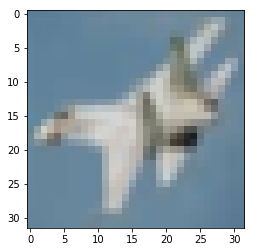

In [ ]:
plt.imshow(X_test[10])

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)             

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
50000/50000 [==============================] - 11s 218us/sample - loss: 4.9132 - sparse_categorical_accuracy: 0.0999
Epoch 2/15
50000/50000 [==============================] - 10s 210us/sample - loss: 4.8520 - sparse_categorical_accuracy: 0.1000
Epoch 3/15
50000/50000 [==============================] - 11s 210us/sample - loss: 4.8520 - sparse_categorical_accuracy: 0.1000
Epoch 4/15
50000/50000 [==============================] - 11s 212us/sample - loss: 4.8520 - sparse_categorical_accuracy: 0.1000
Epoch 5/15
50000/50000 [==============================] - 10s 210us/sample - loss: 4.8520 - sparse_categorical_accuracy: 0.1000
Epoch 6/15
50000/50000 [==============================] - 10s 208us/sample - loss: 4.8520 - sparse_categorical_accuracy: 0.1000
Epoch 7/15
50000/50000 [==============================] - 10s 209us/sample - loss: 4.8520 - sparse_categorical_accuracy: 0.1000
Epoch 8/15
50000/50000 [==============================] - 10s 210us/sample - loss: 4.8520 - sparse_categ

### Model evaluation and prediction

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

In [ ]:
print("Test accuracy: {}".format(test_accuracy))